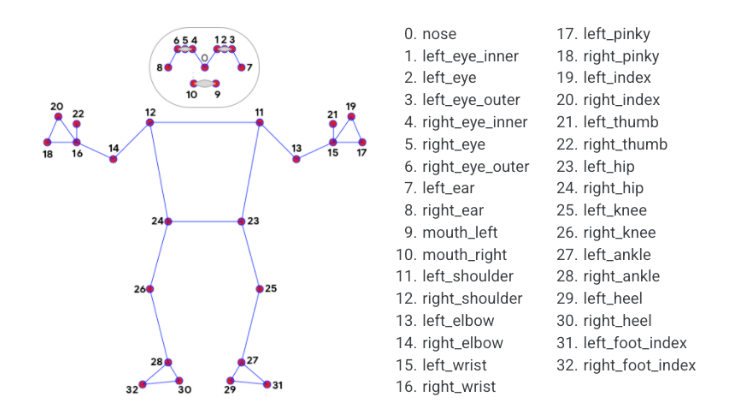

In [1]:
from IPython import display
display.Image(r"C:\Users\ayush\Desktop\img.png")

In [40]:
## Imports 

import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import pandas as pd
import cv2 
import mediapipe as mp 
import numpy as np 
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

right_ankle_x = []
left_ankle_x = []
right_ankle_y = []
left_ankle_y = []
right_hip_y = []
left_hip_y = []

cap = cv2.VideoCapture(r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4")

if (cap.isOpened==False):
    print ("error opening video stream")

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        
        ret, frame = cap.read()

        # Recolor image to RGB
       
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            left_ankle_x.append(landmarks[27].x)
            right_ankle_x.append(landmarks[28].x)
            left_ankle_y.append(landmarks[27].y)
            right_ankle_y.append(landmarks[28].y)            
            right_hip_y.append(landmarks[23].y)            
            left_hip_y.append(landmarks[24].y)

        except:
            pass


        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               


        cv2.imshow('Mediapipe Feed', image)


        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
                
        if ret ==False:
            break
        
        
    cap.release()
    cv2.destroyAllWindows()

In [29]:
image.shape

(640, 480, 3)

In [30]:
landmarks[24].y*640

387.3134231567383

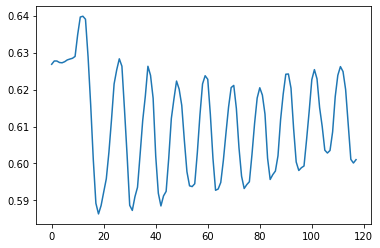

In [41]:
plt.plot(right_hip_y)

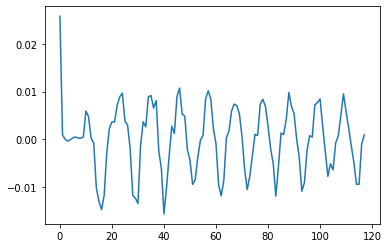

In [52]:
# movement of hips
hip_move =[]
ankle_move =[]
for i in range(len(right_ankle_y)):
    ankle_move.append(right_ankle_y[i]-right_ankle_y[i-1])
for i in range(len(right_hip_y)):
    hip_move.append(right_hip_y[i]-right_hip_y[i-1])

plt.plot(hip_move)

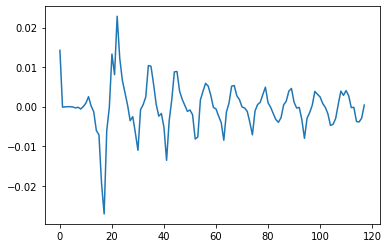

In [54]:
plt.plot(ankle_move)

In [43]:
hip_move

0.0009064674377441406

In [25]:
right_ankle_y = [i*image.shape[1] for i in right_ankle_y]
left_ankle_y = [i*image.shape[1] for i in left_ankle_y]
right_hip_y = [i*image.shape[1] for i in right_hip_y]

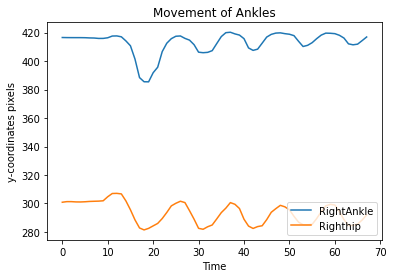

In [26]:
plt.plot(right_ankle_y)
plt.plot(right_hip_y)

plt.xlabel("Time")
plt.ylabel("y-coordinates pixels")
plt.title("Movement of Ankles")
plt.legend(["RightAnkle","Righthip"],loc="lower right")


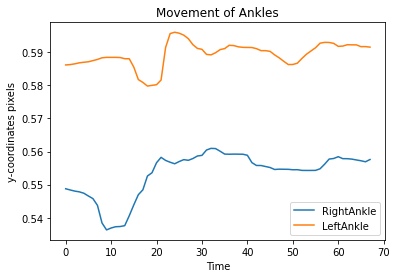

In [27]:
plt.plot(right_ankle_x)
plt.plot(left_ankle_x)

plt.xlabel("Time")
plt.ylabel("y-coordinates pixels")
plt.title("Movement of Ankles")
plt.legend(["RightAnkle","LeftAnkle"],loc="lower right")


In [126]:
fig=px.line(right_hip_y)
# Add range slider
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True),
                             type="linear"))


fig.show()

In [127]:
sum(left_ankle_y)/len(left_ankle_y)

0.859630716641744

In [128]:
print(min(left_ankle_y))
print(max(left_ankle_y))

0.7923635244369507
0.8753100633621216


# Trying to find the local minima to calculate the number of jumps which are being detected. 

Indices of minima: (array([ 4,  6,  9, 11, 14, 16, 18, 22], dtype=int64),)
Minima: [0.4236548  0.43758721 0.38344152 0.52889492 0.07103606 0.0202184
 0.77815675 0.46147936]
Indices of maxima: (array([ 1,  5,  8, 10, 13, 15, 17, 20, 23], dtype=int64),)
Maxima: [0.71518937 0.64589411 0.96366276 0.79172504 0.92559664 0.0871293
 0.83261985 0.97861834 0.78052918]


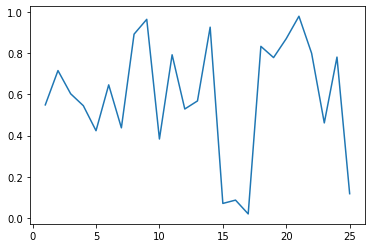

In [55]:
import numpy as np
from scipy.signal import argrelmin, argrelmax
import matplotlib.pyplot as plt


# generate random data
np.random.seed(0)
y = np.random.random_sample(25)
x = np.asarray([i+1 for i in range(25)])

# find local minima and maxima
min_idx = argrelmin(y)
print("Indices of minima: {0}".format(min_idx))
print("Minima: {0}".format(y[min_idx]))

max_idx = argrelmax(y)
print("Indices of maxima: {0}".format(max_idx))
print("Maxima: {0}".format(y[max_idx]))

# plot data
plt.plot(x, y)
 
    

(array([  8,  19,  31,  42,  53,  64,  75,  85,  96, 106, 116], dtype=int64),)
(array([  8,  18,  31,  42,  53,  64,  74,  85,  96, 106, 116], dtype=int64),)


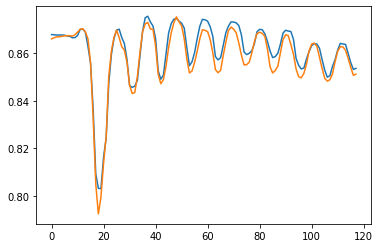

In [56]:
min_idx_r = argrelmin(np.array(right_ankle_y))
min_idx_l = argrelmin(np.array(left_ankle_y))

print(min_idx_r)
print(min_idx_l)

plt.plot(right_ankle_y,label = "right ankle with time")
plt.plot(left_ankle_y,label = "right ankle with time")


(array([  4,  18,  31,  42,  54,  63,  74,  84,  95, 106, 116], dtype=int64),)


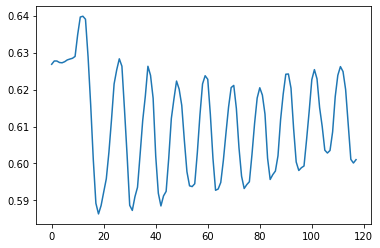

In [58]:
min_idx_r_hip = argrelmin(np.array(right_hip_y))

print(min_idx_r_hip)

plt.plot(right_hip_y,label = "right ankle with time")


In [ ]:
#counter application: 

In [151]:
len(min_idx_r_hip[0])

42

In [150]:
len(min_idx_l[0])

27

Counter part 

In [ ]:
stage = None
Count = 0 

cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        # Rep data
        cv2.putText(image, 'REPS', (15,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                    (10,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        # Stage data
        cv2.putText(image, 'STAGE', (65,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                    (60,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)

In [57]:
import scipy.signal

# Figuring out relationship between time in kinovea and xml recorded

In [222]:
## Imports 

import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import pandas as pd
import cv2 
import mediapipe as mp 
import numpy as np 
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

right_ankle_x = []
left_ankle_x = []
right_ankle_y = []
left_ankle_y = []
right_hip_y = []
left_hip_y = []

cap = cv2.VideoCapture(r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4")

if (cap.isOpened==False):
    print ("error opening video stream")

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        
        ret, frame = cap.read()

        # Recolor image to RGB
       
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            left_ankle_x.append(landmarks[27].x)
            right_ankle_x.append(landmarks[28].x)
            left_ankle_y.append(landmarks[27].y)
            right_ankle_y.append(landmarks[28].y)            
            right_hip_y.append(landmarks[23].y)            
            left_hip_y.append(landmarks[24].y)

        except:
            pass


        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               


        cv2.imshow('Mediapipe Feed', image)


        if cv2.waitKey(100) & 0xFF == ord('q'):
            break
                
        if ret ==False:
            break
        
        
    cap.release()
    cv2.destroyAllWindows()

In [210]:
# measuring the number of frames that are being considered in the video that we have obtained.
print(f"the number of elements are {len(left_hip_y)}")
print(f"the list of maximas is as follows {argrelmax(np.array(left_hip_y))[0]}")
print(f"the list of minimas is as follows {argrelmin(np.array(left_hip_y))[0]}")
print(f"The number of jumps calculated with using maximas and tracking ankles {len(argrelmax(np.array(left_ankle_y))[0])}")
print(f"The number of jumps calculated with using minimas and tracking ankles {len(argrelmin(np.array(left_ankle_y))[0])}")

print(f"The number of jumps calculated with using maximas and tracking hip {len(argrelmax(np.array(left_hip_y))[0])}")
print(f"The number of jumps calculated with using minimas and tracking hip {len(argrelmin(np.array(left_hip_y))[0])}")


the number of elements are 83
the list of maximas is as follows [ 1 12 26 37 48 59 69 80]
the list of minimas is as follows [ 4 18 31 42 54 64 74]
The number of jumps calculated with using maximas and tracking ankles 8
The number of jumps calculated with using minimas and tracking ankles 7
The number of jumps calculated with using maximas and tracking hip 8
The number of jumps calculated with using minimas and tracking hip 7


Text(0.5, 1.0, 'Movement of Hip Throughout the video')

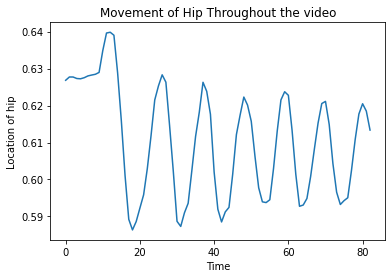

In [211]:
plt.plot(right_hip_y)
plt.ylabel("Location of hip")
plt.xlabel("Time")
plt.title("Movement of Hip Throughout the video")

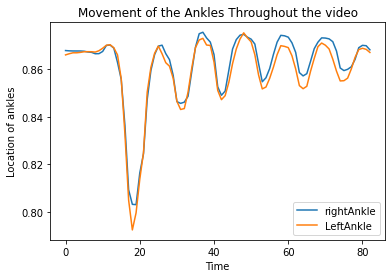

In [212]:
plt.plot(right_ankle_y,label='rightAnkle')
plt.plot(left_ankle_y,label="leftAnkle")
plt.ylabel("Location of ankles")
plt.xlabel("Time")
plt.title("Movement of the Ankles Throughout the video")
plt.legend(["rightAnkle","LeftAnkle"])

In [213]:
# number of jumps detected when tracking with the ankle

len(argrelmax(np.array(right_ankle_y))[0])

7

In [214]:
'''number of jumps detected when we track the movement of hips and measure the local maximas in the curve to identify"
   the number of jumps'''

len(argrelmax(np.array(left_hip_y))[0])

8

In [215]:
# number of jumps detected when we track the movement of the hips and measure the local minimas to identify the jumps

len(argrelmin(np.array(left_hip_y))[0])

7

In [216]:
argrelmin(np.array(left_hip_y))[0]

array([ 4, 18, 31, 42, 54, 64, 74], dtype=int64)

In [217]:
argrelmax(np.array(left_ankle_y))[0]

array([ 6, 12, 25, 37, 48, 58, 69, 80], dtype=int64)

In [218]:
argrelmax(np.array(left_hip_y))[0]

array([ 1, 12, 26, 37, 48, 59, 69, 80], dtype=int64)

# Read XML
### reading the xml file ground truth recorded in kinovea

In [219]:
df = pd.read_html(r"C:\Users\ayush\Desktop\Jump Rope Code\XML\JumpRopeChairAngleBESTANDLATEST.html")

In [220]:
new_df = pd.DataFrame(df[0])
new_df

,0,1
0,Key Images,Key Images
1,Name,Time
2,0.00,0.00
3,UpJump1,0.20
4,downJump1,0.37
...,...,...
114,DownJump57,45.34
115,UpJump58,45.50
116,DownJump58,45.70
117,UpJump59,45.87


In [221]:
new_df[2:]

,0,1
2,0.00,0.00
3,UpJump1,0.20
4,downJump1,0.37
5,UpJump2,0.60
6,downJump2,0.77
...,...,...
114,DownJump57,45.34
115,UpJump58,45.50
116,DownJump58,45.70
117,UpJump59,45.87


### make 2 dfs in which one has all the up jumps which can be compared with maximas and another with jumps labelled as down which has all the jumps labelled as down to compare with the maximas 

hello
